Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Aprendizaje_Automático-diana/datos1.csv
El archivo existe en la ruta especificada.
   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0           1  female     group B   bachelor's degree      standard   
1           2  female     group C        some college      standard   
2           3  female     group B     master's degree      standard   
3           4    male     group A  associate's degree  free/reduced   
4           5    male     group C        some college      standard   

    TestPrep  MathScore  ReadingScore  WritingScore  
0       none         72            72            74  
1  completed         69            90            88  
2       none         90            95            93  
3       none         47            57            44  
4       none         76            78            75  
        Unnam

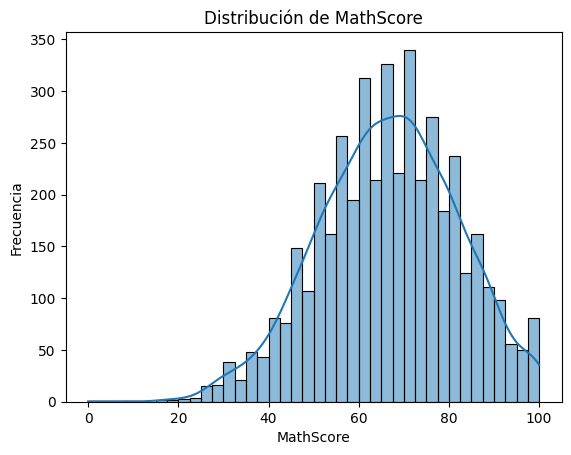

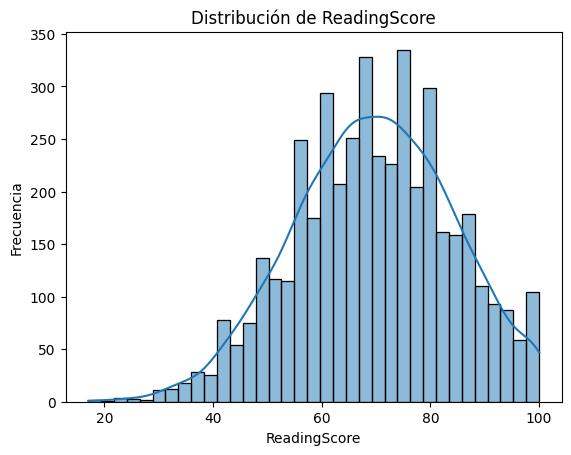

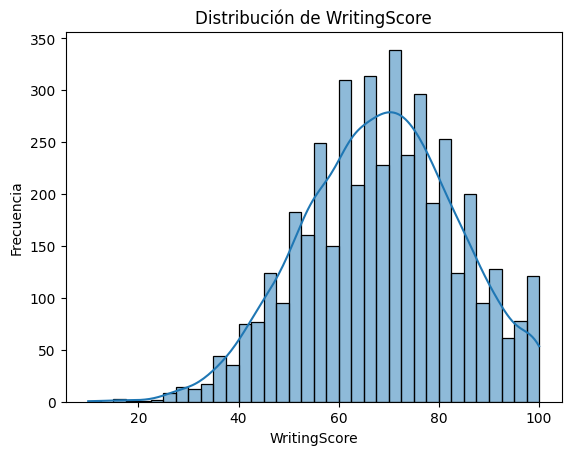

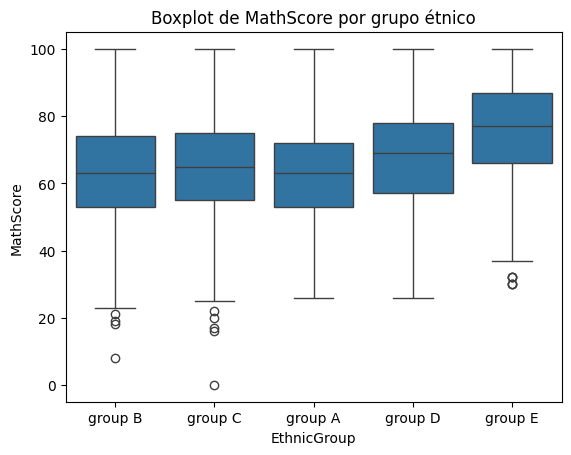

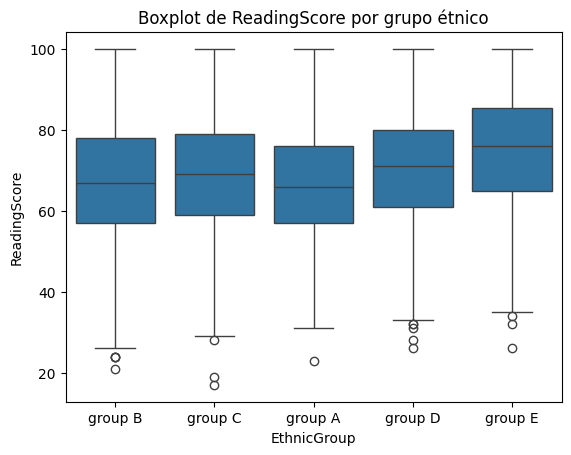

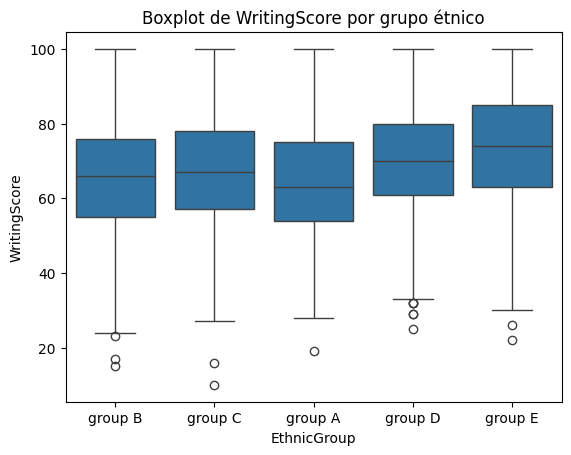

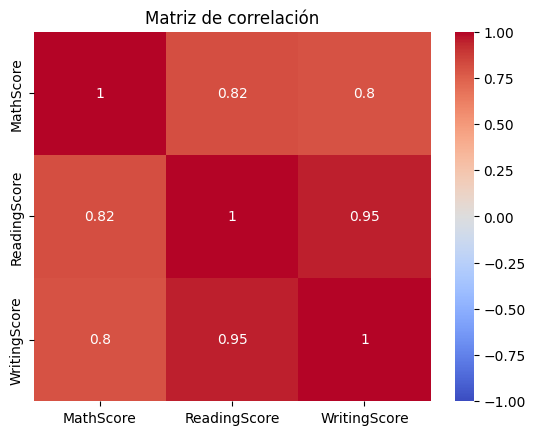

Estadístico t: 12.144540958626012, p-valor: 2.0689384257189044e-33
Estadístico F: 89.2976784022302, p-valor: 4.2169017984055695e-73
Estadístico chi-cuadrado: 0.3459305769778599, p-valor: 0.5564258210228803
Coeficiente de correlación: 0.8168184703827065, p-valor: 0.0


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/Aprendizaje_Automático-diana/datos1.csv

import os
if os.path.exists(file_path):
    print("El archivo existe en la ruta especificada.")
else:
    print("El archivo NO existe en la ruta especificada.")

# Leer el archivo CSV en un DataFrame de pandas
try:
    df = pd.read_csv(file_path)
    # Mostrar las primeras filas del DataFrame
    print(df.head())
except Exception as e:
    print(f"Error al leer el archivo CSV: {e}")
estadisticas_descriptivas = df.describe()
print(estadisticas_descriptivas)

# Histograma para MathScore
sns.histplot(df['MathScore'], kde=True)
plt.title('Distribución de MathScore')
plt.xlabel('MathScore')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para ReadingScore
sns.histplot(df['ReadingScore'], kde=True)
plt.title('Distribución de ReadingScore')
plt.xlabel('ReadingScore')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para WritingScore
sns.histplot(df['WritingScore'], kde=True)
plt.title('Distribución de WritingScore')
plt.xlabel('WritingScore')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de caja (boxplot) para MathScore por grupo étnico
sns.boxplot(x='EthnicGroup', y='MathScore', data=df)
plt.title('Boxplot de MathScore por grupo étnico')
plt.show()

# Gráfico de caja (boxplot) para ReadingScore por grupo étnico
sns.boxplot(x='EthnicGroup', y='ReadingScore', data=df)
plt.title('Boxplot de ReadingScore por grupo étnico')
plt.show()

# Gráfico de caja (boxplot) para WritingScore por grupo étnico
sns.boxplot(x='EthnicGroup', y='WritingScore', data=df)
plt.title('Boxplot de WritingScore por grupo étnico')
plt.show()

# Calcular la matriz de correlación
correlacion = df[['MathScore', 'ReadingScore', 'WritingScore']].corr()

# Visualizar la matriz de correlación
sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()

from scipy import stats

# Prueba t de Student para MathScore entre géneros
#Nula (H0): Las medias de las puntuaciones en matemáticas son iguales entre los dos géneros.
#Alternativa (H1): Las medias de las puntuaciones en matemáticas no son iguales entre los dos géneros.
grupo_masculino = df[df['Gender'] == 'male']['MathScore']
grupo_femenino = df[df['Gender'] == 'female']['MathScore']

t_stat, p_value = stats.ttest_ind(grupo_masculino, grupo_femenino)
print(f"Estadístico t: {t_stat}, p-valor: {p_value}")

# Prueba ANOVA para MathScore entre grupos étnicos
#Nula (H0): Las medias de las puntuaciones en matemáticas son iguales entre todos los grupos étnicos.
# Alternativa (H1): Al menos una de las medias de las puntuaciones en matemáticas es diferente.
grupo_etnico = [df[df['EthnicGroup'] == grupo]['MathScore'] for grupo in df['EthnicGroup'].unique()]

f_stat, p_value = stats.f_oneway(*grupo_etnico)
print(f"Estadístico F: {f_stat}, p-valor: {p_value}")

# Nula (H0): No hay relación entre el género y el tipo de almuerzo.
# Alternativa (H1): Hay una relación entre el género y el tipo de almuerzo.
# Tabla de contingencia
contingencia = pd.crosstab(df['Gender'], df['LunchType'])

# Prueba de chi-cuadrado
chi2, p, dof, ex = stats.chi2_contingency(contingencia)
print(f"Estadístico chi-cuadrado: {chi2}, p-valor: {p}")

#Nula (H0): No hay correlación entre las puntuaciones en matemáticas y lectura.
# Alternativa (H1): Hay correlación entre las puntuaciones en matemáticas y lectura.
# Prueba de correlación de Pearson
corr, p_value = stats.pearsonr(df['MathScore'], df['ReadingScore'])
print(f"Coeficiente de correlación: {corr}, p-valor: {p_value}")





